## PAMR: Passive aggressive mean reversion strategy for portfolio selection
### source : 
    https://en.wikipedia.org/wiki/Mean_reversion_(finance)
    https://hudsonthames.org/online-portfolio-selection-mean-reversion/

## Passive Aggressive Mean Reversion
La stratégie de réversion moyenne passive et agressive **alterne entre une approche passive et agressive des conditions actuelles du marché**. Cette stratégie permet d'éviter efficacement une perte énorme et de maximiser les rendements en fixant un seuil pour la réversion moyenne.

PAMR prend en compte une variable **X**, un seuil pour la condition du marché. Si les rendements du portefeuille pour la période sont inférieurs à **X**, alors PAMR conservera passivement le portefeuille précédent, tandis que si les rendements sont supérieurs au seuil, le portefeuille sera activement rééquilibré vers les actifs les moins performants.

D'une certaine manière, **X** peut être interprété comme la perte maximale pour le portefeuille. Il est très probable que l'actif dont le prix a baissé pendant la période rebondisse, mais il arrive que la valeur de certaines entreprises s'effondre. PAMR est un algorithme efficace qui permet d'éviter des pertes énormes en suivant aveuglément ces actifs. Trois méthodes différentes de PAMR ont été implémentées dans le module avec différents niveaux d'agressivité envers la réversion moyenne.

## La réversion moyenne
La réversion moyenne est un terme financier qui désigne l'hypothèse selon laquelle le prix d'un actif aura tendance à converger vers le prix moyen au fil du temps.

L'utilisation de la réversion moyenne comme stratégie de synchronisation implique à la fois l'identification de la fourchette de négociation d'un titre et le calcul du prix moyen à l'aide de méthodes quantitatives. Le retour à la moyenne est un phénomène que l'on peut observer dans une multitude de séries chronologiques de données financières, qu'il s'agisse de données sur les prix, les bénéfices ou la valeur comptable.

Lorsque le prix actuel du marché est inférieur au prix moyen passé, le titre est considéré comme intéressant à acheter, dans l'espoir que le prix augmentera. Lorsque le prix actuel du marché est supérieur au prix moyen passé, le prix du marché devrait baisser. En d'autres termes, les écarts par rapport au prix moyen sont censés revenir à la moyenne. Cette connaissance sert de pierre angulaire à de multiples stratégies de négociation.

In [46]:
import sys
print(sys.path)
sys.path.append('C:\\Users\\sofia\\universal-portfolios')
sys.path

['C:\\Users\\sofia\\pyCrypto\\delivery_1', 'C:\\ProgramData\\Anaconda3\\python39.zip', 'C:\\ProgramData\\Anaconda3\\DLLs', 'C:\\ProgramData\\Anaconda3\\lib', 'C:\\ProgramData\\Anaconda3', '', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\sofia\\universal-portfolios', 'C:\\Users\\sofia\\universal-portfolios']


['C:\\Users\\sofia\\pyCrypto\\delivery_1',
 'C:\\ProgramData\\Anaconda3\\python39.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\sofia\\universal-portfolios',
 'C:\\Users\\sofia\\universal-portfolios',
 'C:\\Users\\sofia\\universal-portfolios']

In [47]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

import universal as up
from universal import tools, algos
from universal.algos import *

sns.set_context("notebook")
plt.rcParams["figure.figsize"] = (12, 7)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
from pandas_datareader.data import DataReader

# Télechargement des données depuis yahoo
yahoo_data = DataReader(['BTC-USD', 'ETH-USD', 'BNB-USD', 'XRP-USD', 'ADA-USD', 'SOL-USD','DOGE-USD'], 'yahoo', start=dt.datetime(2021,1,1))['Adj Close']
mS = yahoo_data.resample('M').last()
wS = yahoo_data.resample('W').last()

In [49]:
yahoo_data.head()

Symbols,BTC-USD,ETH-USD,BNB-USD,XRP-USD,ADA-USD,SOL-USD,DOGE-USD
Date,,,,,,,
2021-01-01,29374.152344,730.367554,37.905010,0.237444,0.175350,1.842084,0.005685
2021-01-02,32127.267578,774.534973,38.241592,0.221655,0.177423,1.799275,0.010615
2021-01-03,32782.023438,975.507690,41.148979,0.225848,0.204995,2.161752,0.009771
2021-01-04,31971.914062,1040.233032,40.926353,0.236677,0.224762,2.485097,0.009767
2021-01-05,33992.429688,1100.006104,41.734600,0.226750,0.258314,2.157217,0.009920


In [50]:
wS

Symbols,BTC-USD,ETH-USD,BNB-USD,XRP-USD,ADA-USD,SOL-USD,DOGE-USD
Date,,,,,,,
2021-01-03,32782.023438,975.507690,41.148979,0.225848,0.204995,2.161752,0.009771
2021-01-10,38356.441406,1262.246704,42.448475,0.318336,0.304895,3.466111,0.009860
2021-01-17,35791.277344,1230.172241,45.684612,0.277384,0.379852,3.818139,0.009067
2021-01-24,32289.378906,1391.609375,41.881607,0.273509,0.353881,3.634411,0.008727
2021-01-31,33114.359375,1314.986206,44.275993,0.492314,0.344898,4.264144,0.037196
...,...,...,...,...,...,...,...
2022-06-12,26762.648438,1445.216553,255.950882,0.345490,0.496861,30.743271,0.064336
2022-06-19,20553.271484,1127.656494,214.920532,0.326053,0.484364,34.243748,0.060396
2022-06-26,21027.294922,1199.831665,233.858749,0.358864,0.489653,39.408089,0.073177


In [51]:
algo = PAMR()
result = algo.run(wS)
print(result.max_drawdown)
print(result.drawdown_period)

0.8730304122817149
209.98849315068492


C:\Users\sofia\universal-portfolios\universal\algos\pamr.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  lam = le / np.linalg.norm(x - x_mean) ** 2


Summary:
    Profit factor: 1.08
    Sharpe ratio: 0.72 ± 0.91
    Ulcer index: 2.14
    Information ratio (wrt UCRP): -1.98
    UCRP sharpe: 1.55 ± 1.21
    Appraisal ratio (wrt UCRP): -1.80 ± 0.83
    Beta / Alpha: 0.95 / -86.636%
    Annualized return: 87.84%
    Annualized volatility: 121.18%
    Longest drawdown: 210 days
    Max drawdown: 87.30%
    Winning days: 45.6%
    Annual turnover: 57.8
        


[<AxesSubplot:title={'center':'Combined strategy'}, xlabel='Date', ylabel='Total wealth'>]

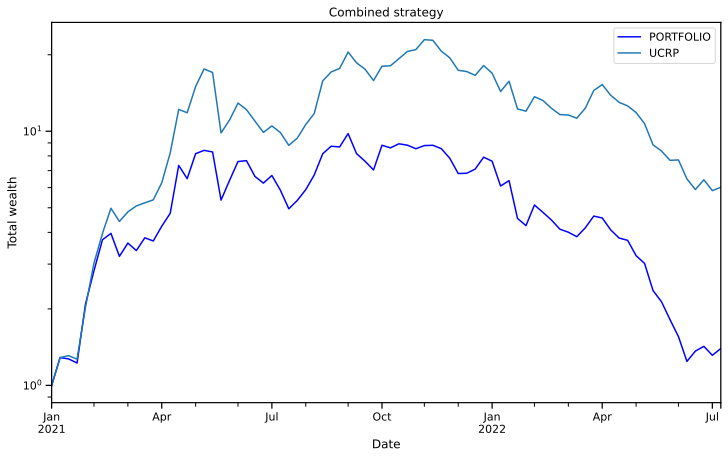

In [52]:
print(result.summary())
result.plot(logy=True, assets=False, weights=False, ucrp=True, title='Combined strategy')

C:\Users\sofia\universal-portfolios\universal\result.py:415: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  if B.drop(["CASH"], 1, errors="ignore").values.min() < -0.01:
C:\Users\sofia\universal-portfolios\universal\result.py:424: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  B = B.drop("CASH", 1, errors="ignore")


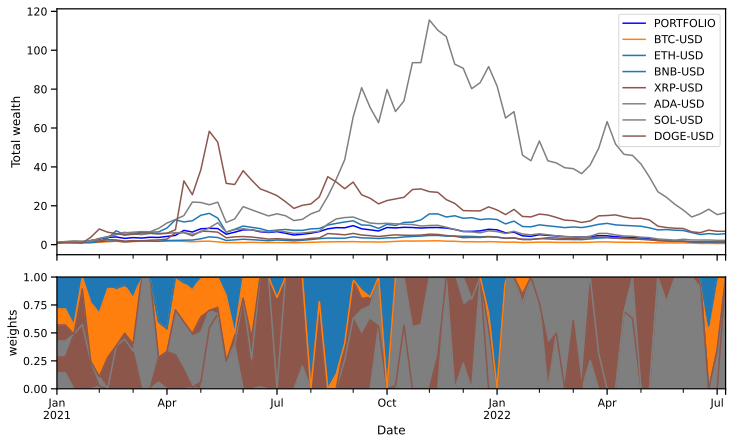

In [53]:
result.plot();